In [1]:
import scipy as sp
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack
import math

In [2]:
csv_dir_path = "../data/Part_1"

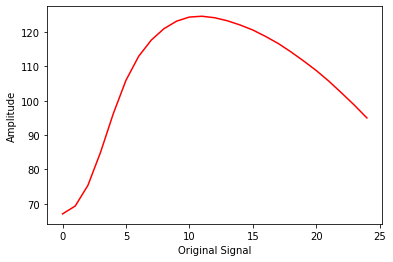

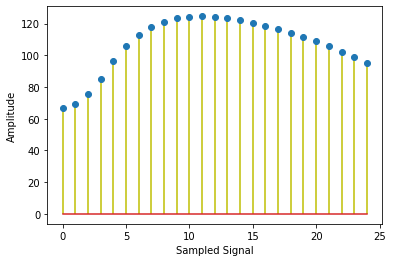

6 6


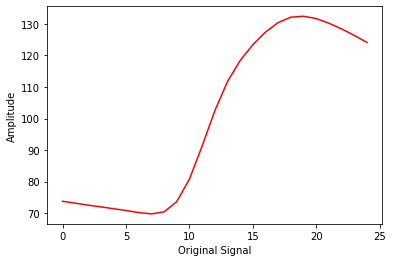

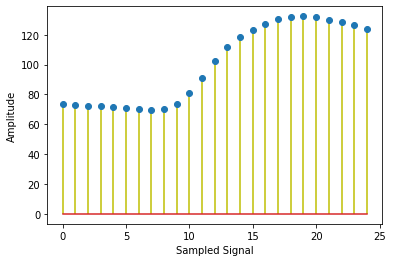

6 6


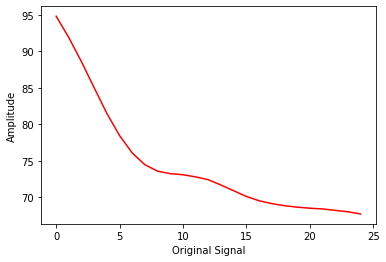

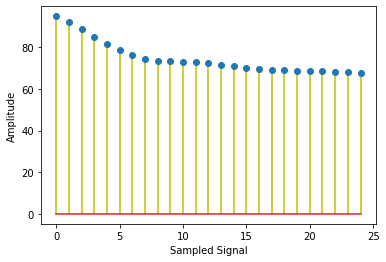

6 6


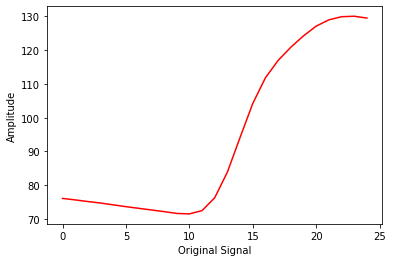

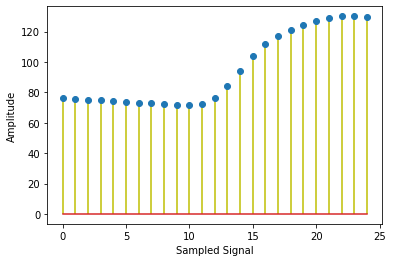

6 6


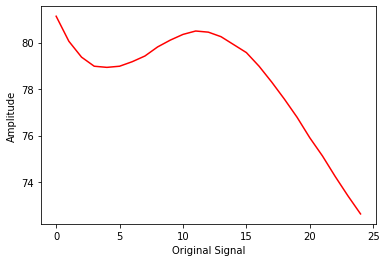

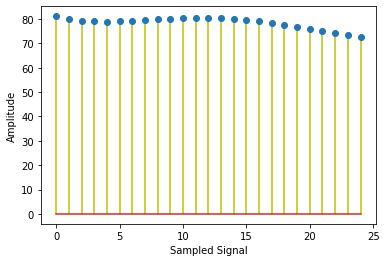

6 6


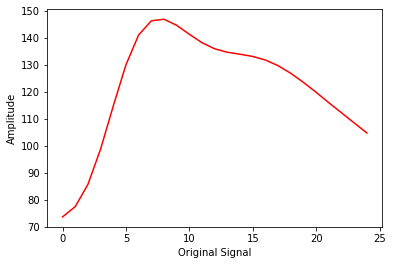

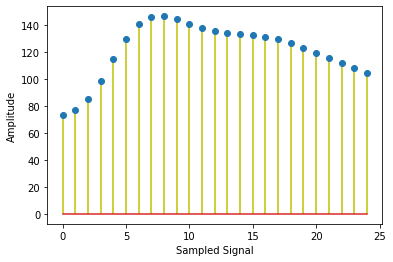

6 6


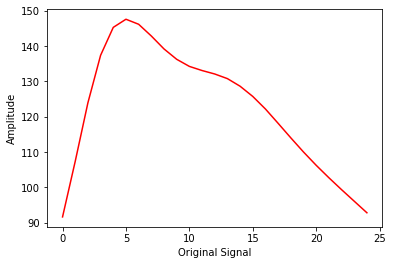

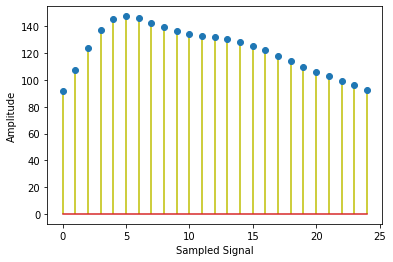

6 6


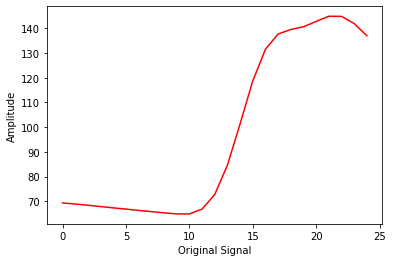

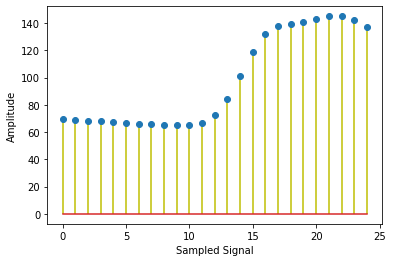

6 6


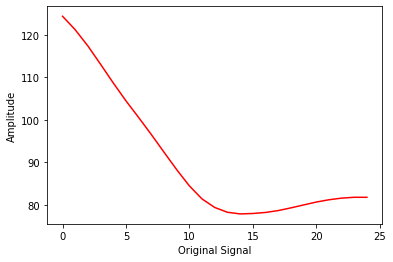

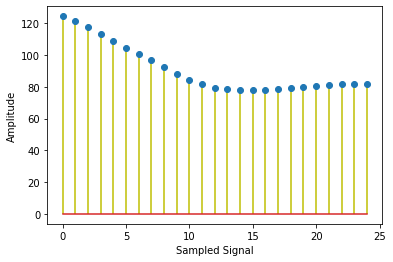

6 6


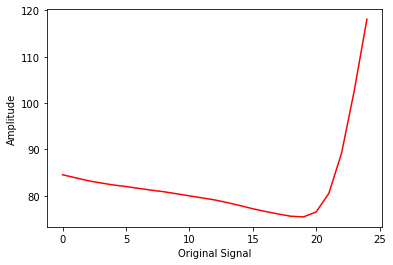

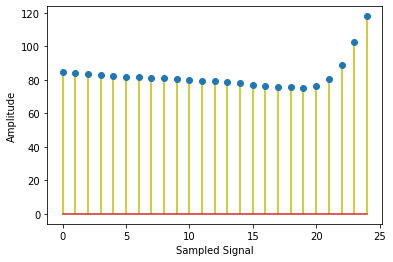

6 6


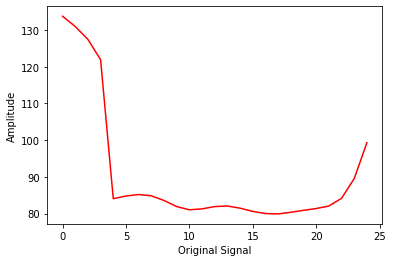

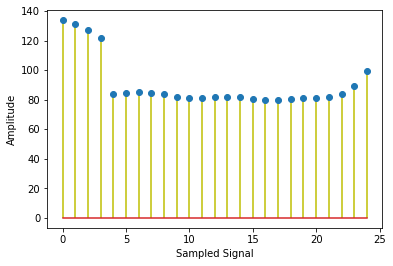

6 6


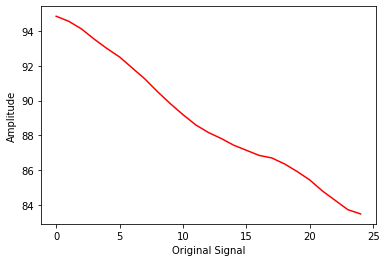

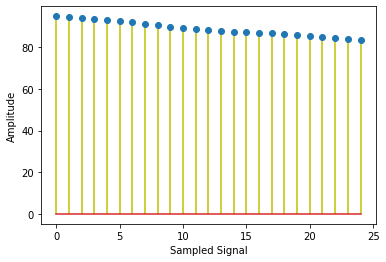

6 6


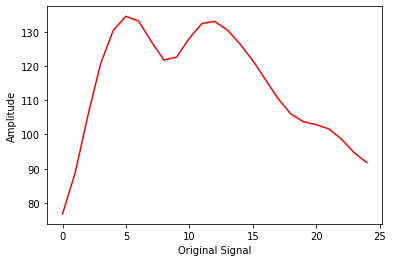

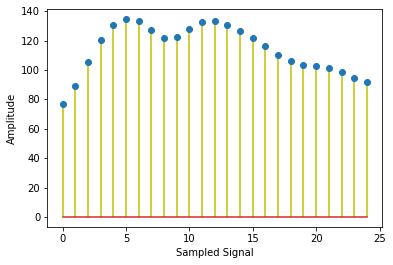

6 6


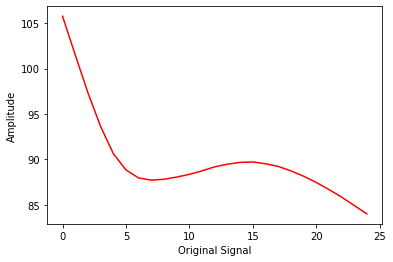

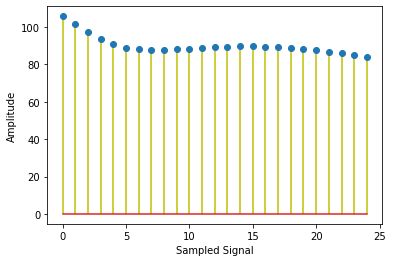

6 6


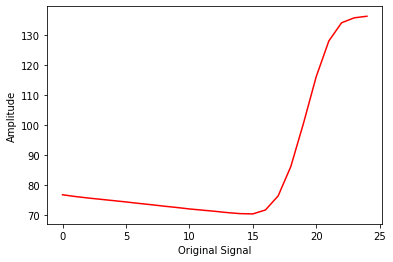

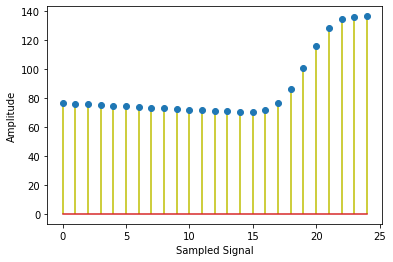

6 6


In [4]:
csv_paths = []

for patNum in range(1,16):
    csv_paths.append(os.path.join(csv_dir_path, str(patNum)+".csv"))

for i in range(15):
    Y = np.genfromtxt(csv_paths[i], delimiter=",")
    # Extracting row cooresponding to PPG signal
    # Note that the first row of csv file is PPG signal
    P01 = Y[0, :1000]

    # Extracting row cooresponding to BP signal
    BP  = Y[1, :1000]

    # Extracting row cooresponding to ECG signal
    E01 = Y[2, :1000]

    Fy  = np.gradient(P01)
    T = np.arange(0, 8, 0.008)
    # figure('PPG 1st derivative')
    # Uncomment below to check the graphs found from the first derivative of PPG
    
    P001=Y[1,:25]
    plt.plot(range(len(P001)),P001,color='red',label='Original Signal')
    plt.xlabel("Original Signal")
    plt.ylabel("Amplitude")
    plt.show()
    
    plt.stem(range(len(P001)),P001,'y',label='Sampled Signal')
    plt.xlabel("Sampled Signal")
    plt.ylabel("Amplitude")
   
    plt.show()
    
    
    '''
    Fx  = np.gradient(E01)
    plt.plot(range(len(E01)),E01,color='blue')
    plt.xlabel("ECG Signal")
    plt.ylabel("Amplitude")
    plt.show()
    
    plt.plot(range(len(Fx)),Fx,'red')
    plt.xlabel("Gradient (First derivative) of ECG Signal")
    plt.ylabel("Amplitude")
   
    plt.show()
    '''
    

    Fy1 = np.gradient(Fy)

    # figure('PPG 2nd derivative')
    # Uncomment below to check the graphs found from the second derivative of PPG
    """
    plt.plot(range(len(Fy)),Fy)
    plt.xlabel("PPG second derivative")
    plt.show()
    """

    F = np.ones(1000)
    np.append(F, P01)
    np.append(F, Fy1)
    np.append(F, E01)

    L = len(Fy1)

    # Sampling frequency = 125 Hz
    Fs = 125
    # Time vector based on sampling rate
    Ts = 1 / Fs

    T = np.arange(0, 8, 0.008)

    # Find peaks or local maximum of PPG signals
    [pk, loc] = signal.find_peaks(P01)

    # Finding the local minimum of the PPG signals
    PPG1 = max(P01) - P01
    [pk1, loc1] = signal.find_peaks(PPG1)




    # find peaks working
    '''
    plt.plot(range(len(P01)),P01,'r')
    plt.plot(pk,P01[pk], 'g')
    plt.xlabel("pk")
    plt.show()
    #print(pk)
    '''  
    
    # Systolic time
    sys_time = 0

    for i in range(5): #changed (SID)
        sys_time = sys_time + T[pk[i]] - T[pk1[i]]

    sys_time = sys_time / 5

    # Diastolic time
    dias_time = 0

    for i in range(5): #changed (SID)
        dias_time = dias_time + T[pk1[i+1]] - T[pk[i]]

    dias_time = dias_time / 5

    v = [0.1, 0.25, 0.33, 0.5, 0.66, 0.75]

    ppg_21_st = []
    ppg_21_dt = []

    a = 0
    b = 0

    for j in range(6): #changed (SID)
        for i in range(pk1[0], pk[0], 1):
            if P01[i] >= (v[j] * P01[0] + PPG1[0]):
                a = i
                break

        for i in range(pk[1], pk1[2], 1):
            if P01[i] <= (v[j] * P01[0] + PPG1[0]):
                b = i
                break

        ppg_21_st.append((pk[0] - a) * 0.008)
        ppg_21_dt.append((b - pk[0]) * 0.008)

    # max value of ECG signal
    [pk2, loc2] = signal.find_peaks(E01, prominence=(None, 0.6))

    [pk3, loc3] = signal.find_peaks(Fy1, prominence=(None, 0.003))

    n = len(pk2)  # to find out vector dimensions of ECG signal
    y = len(pk3)

    P1 = np.take(T, pk2)
    P = np.take(T, pk3)
    P11 = P1[1:n]
    P2 = P[1:y]
    ptt = 0

    temp = min(y, n)
    minRange = min(temp, 5)

    for i in range(minRange - 1):
        ptt = ptt + abs(P2[i] - P11[i])

    ptt = ptt / minRange
    # print(ptt)

    lr1 = len(pk1)
    # print(lr1)
    rationum = 0
    ratioden = 0

    ih = 0
    il = 0

    for i in range(1, lr1 - 1, 1):
        rationum = rationum + pk[i]
        ratioden = ratioden + pk1[i]

    ih = rationum / (lr1 - 1)
    il = ratioden / (lr1 - 1)
    # print(il,' il,ih ',ih)

    PIR = ih / il
    RR = fftpack.diff(P1)  # to find time taken for 1 heartbeat

    HR = np.zeros(len(RR)).astype(np.float32)
    HR = np.divide(60, RR, HR)
    # print(HR)

    # hrfinal = np.zeros(len(HR)).astype(np.float32)
    hrfinal = 0
    lr1 = len(HR)
    tlr1 = lr1

    for i in range(1, lr1, 1):
        t = HR[i]

        if t <= 30 or t >= 200:
            tlr1 = tlr1 - 1
        else:
            hrfinal = hrfinal + HR[i]

    hrfinal = hrfinal / (tlr1);    
    #print(hrfinal)
    
    '''
    plt.plot(T,P01)
    plt.xlabel("T")
    plt.ylabel("PPG signal")
    plt.show()
    '''
    
    '''
    plt.plot(T,E01)
    plt.xlabel("T")
    plt.ylabel("ECG signal")
    plt.show()
    '''
    Yy = np.fft.fft(P01)
    # print(Yy[0])
    Yy[0] = 0
    S  = np.real(np.fft.ifft(Yy))

    [pk4, loc4] = signal.find_peaks(S)
    [pk5, loc5] = signal.find_peaks(BP)

    lr1 = len(pk4)
    iftmax = 0

    for i in pk:
        iftmax += S[i]

    meu = iftmax/(lr1-1)

    # print(il, meu, hrfinal)
    alpha = il * math.sqrt(1060 * hrfinal / meu)

    BP1 = max(BP) - BP
    [pk6, loc6] = signal.find_peaks(BP1)

    lr1 = len(pk5)
    bpmax = 0

    for i in pk:
        bpmax += BP[i]

    bpmax /= (lr1-1)
    #print(bpmax)

    lr1 = len(pk6)
    bpmin = 0

    for i in pk6:
        bpmin += BP1[i]

    bpmin /= (lr1-1)
    #print(bpmin)

    print(len(ppg_21_st),len(ppg_21_dt))
    filerow1 = [
                    ppg_21_dt[0],
                    ppg_21_st[0] + ppg_21_dt[0],
                    ppg_21_dt[0] / ppg_21_st[0],
                    ppg_21_dt[1],
                    ppg_21_st[1] + ppg_21_dt[1], 
                    ppg_21_dt[1] / ppg_21_st[1], 
                    ppg_21_dt[2], 
                    ppg_21_st[2] + ppg_21_dt[2], 
                    ppg_21_dt[2] / ppg_21_st[2], 
                    ppg_21_dt[3], 
                    ppg_21_st[3] + ppg_21_dt[3], 
                    ppg_21_dt[3] / ppg_21_st[3], 
                    ppg_21_dt[4], 
                    ppg_21_st[4] + ppg_21_dt[4], 
                    ppg_21_dt[4] / ppg_21_st[4], 
                    ppg_21_dt[5], 
                    ppg_21_st[5] + ppg_21_dt[5], 
                    ppg_21_dt[5] / ppg_21_st[5], 
                    sys_time, 
                    dias_time
                ]
    
    #print(filerow1)
    
    
    total_abp=0.0
    
    for i in range (len(BP)):
        total_abp=total_abp+BP[i]
    total_abp=total_abp/len(BP)
    
    file2=[bpmax,bpmin,total_abp]
    with open('../output/features_20.csv', 'a') as f:
        for par in filerow1:
            f.write(str(par) + ",")
        f.write("\n")
    with open('../output/bp.csv', 'a') as f:
        for par in file2:
            f.write(str(par) + ",")
        f.write("\n")